In [418]:
#Name: Vedant Paresh Shah
#NET ID: VXS200021
#Course: AI CS6364.002

# Question 2:

In [419]:
import torch
import torch.nn as nn
import torch.utils.data as data_utils
import numpy as np
import pandas as pd
from pandas import get_dummies, read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [420]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

<AxesSubplot:>

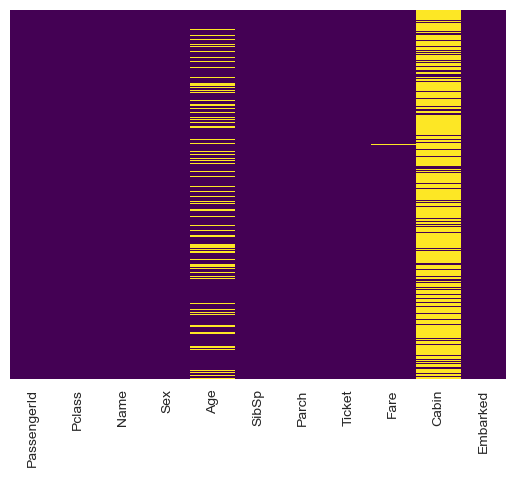

In [421]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [422]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [423]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [424]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [425]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [426]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [427]:
X = train.drop('Survived',axis=1)
Y = train['Survived']

In [428]:
s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X), columns = X.columns)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,-1.732505,0.825209,-0.531670,0.431350,-0.474326,-0.500240,0.735342,-0.307941,0.616794
1,-1.728611,-1.572211,0.680232,0.431350,-0.474326,0.788947,-1.359911,-0.307941,-1.621287
2,-1.724718,0.825209,-0.228695,-0.475199,-0.474326,-0.486650,-1.359911,-0.307941,0.616794
3,-1.720825,-1.572211,0.453001,0.431350,-0.474326,0.422861,-1.359911,-0.307941,0.616794
4,-1.716931,0.825209,0.453001,-0.475199,-0.474326,-0.484133,0.735342,-0.307941,0.616794


In [429]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20,random_state=101)

In [430]:
X_train=torch.tensor(X_train.values, dtype=torch.float32)
X_test=torch.tensor(X_test.values, dtype=torch.float32)
Y_train=torch.tensor(Y_train.values, dtype=torch.float32)
Y_test=torch.tensor(Y_test.values, dtype=torch.float32)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

torch.Size([711, 9])
torch.Size([178, 9])
torch.Size([711])
torch.Size([178])


In [431]:
class Model(nn.Module):
    def __init__(self, n_features, hidden_A, hidden_B):
        super(Model, self).__init__()
        self.linear_A = nn.Linear(n_features, hidden_A)
        self.linear_B = nn.Linear(hidden_A, hidden_B)
        self.linear_C = nn.Linear(hidden_B, 1)

    def forward(self, x):
        y_A = F.relu(self.linear_A(x))
        y_B = F.tanh(self.linear_B(y_A))
        return self.linear_C(y_B)

In [432]:
n_samples, n_features = X_train.shape
model=Model(n_features,5,3).to(device)
loss_func= torch.nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

In [433]:
epochs = 100
for i in range(epochs):
    Y_pred = model(X_train)
    loss=loss_func(Y_pred.flatten(), Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('Epoch {}'.format(i+1) + ' Loss : {}'.format(loss))

Epoch 1 Loss : 0.6705923080444336
Epoch 2 Loss : 0.6702867150306702
Epoch 3 Loss : 0.6699860095977783
Epoch 4 Loss : 0.6696892976760864
Epoch 5 Loss : 0.6693962812423706
Epoch 6 Loss : 0.6691081523895264
Epoch 7 Loss : 0.6688244342803955
Epoch 8 Loss : 0.6685445308685303
Epoch 9 Loss : 0.668268084526062
Epoch 10 Loss : 0.6679940819740295
Epoch 11 Loss : 0.6677224040031433
Epoch 12 Loss : 0.6674529314041138
Epoch 13 Loss : 0.6671850681304932
Epoch 14 Loss : 0.6669198274612427
Epoch 15 Loss : 0.6666558980941772
Epoch 16 Loss : 0.6663932800292969
Epoch 17 Loss : 0.6661313772201538
Epoch 18 Loss : 0.6658700704574585
Epoch 19 Loss : 0.6656093001365662
Epoch 20 Loss : 0.6653492450714111
Epoch 21 Loss : 0.6650898456573486
Epoch 22 Loss : 0.6648311018943787
Epoch 23 Loss : 0.6645724773406982
Epoch 24 Loss : 0.6643126606941223
Epoch 25 Loss : 0.6640525460243225
Epoch 26 Loss : 0.6637921929359436
Epoch 27 Loss : 0.6635318398475647
Epoch 28 Loss : 0.6632706522941589
Epoch 29 Loss : 0.663008153438

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [434]:
prediction_X_train = model(X_train)
prediction_1=[1 if i>0.5 else 0 for i in prediction_X_train]

print("The model performance for training set")
print("--------------------------------------")
print(classification_report(Y_train,Y_train_pred))
print("Training Accuracy:", accuracy_score(Y_train, prediction_1))
print("\n")

prediction_X_test = model(X_test)
prediction_2=[1 if i>0.5 else 0 for i in prediction_X_test]

print("The model performance for testing set")
print("--------------------------------------")
print(classification_report(Y_test,Y_test_pred))
print("Test Accuracy:", accuracy_score(Y_test, prediction_2))

The model performance for training set
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77       442
         1.0       0.00      0.00      0.00       269

    accuracy                           0.62       711
   macro avg       0.31      0.50      0.38       711
weighted avg       0.39      0.62      0.48       711

Training Accuracy: 0.6216596343178622


The model performance for testing set
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75       107
         1.0       0.00      0.00      0.00        71

    accuracy                           0.60       178
   macro avg       0.30      0.50      0.38       178
weighted avg       0.36      0.60      0.45       178

Test Accuracy: 0.601123595505618


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/torch/nn/fun